In [1]:
import matplotlib.pyplot as plt
import tifffile as tif
import pandas as pd
import PIL.Image as Image
import numpy as np
import colorsys
import zipfile
import os
from explore import *

Enumerating folder:  /zenodo/
Enumerating folder:  /zenodo/release-part1/
Enumerating folder:  /zenodo/Testing/
Enumerating folder:  /zenodo/Testing/Hidden/
Enumerating folder:  /zenodo/Testing/Hidden/images/
Enumerating folder:  /zenodo/Testing/Hidden/osilab_seg/
Inspecting archive:  /zenodo/Testing/Hidden/osilab_seg.zip
Enumerating folder:  /zenodo/Testing/Public/
Enumerating folder:  /zenodo/Testing/Public/1st_osilab_eval_results/
Enumerating folder:  /zenodo/Testing/Public/1st_osilab_seg/
Enumerating folder:  /zenodo/Testing/Public/images/
Enumerating folder:  /zenodo/Testing/Public/labels/
Enumerating folder:  /zenodo/Testing/Public/osilab_seg_WSI/
Enumerating folder:  /zenodo/Testing/Public/WSI/
Enumerating folder:  /zenodo/Testing/Public/WSI-labels/
Inspecting archive:  /zenodo/Testing.zip
Inspecting archive:  /zenodo/train-unlabeled-part1.zip
Enumerating folder:  /zenodo/train-unlabeled-part2/
Inspecting archive:  /zenodo/train-unlabeled-part2.zip
Enumerating folder:  /zenodo/T

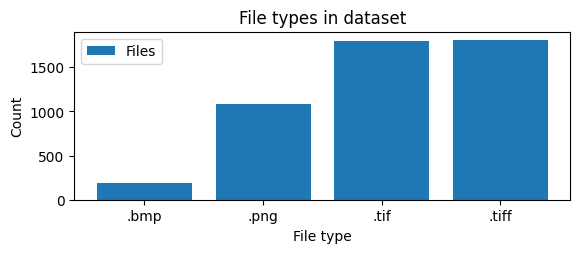

In [2]:
dataroot = "../../data"
zenodo = ZenodoNeurIPS('/zenodo')
unzip_dataset(dataroot + "/raw", folder= zenodo.root + "/")
files_by_type = list_dataset(dataroot + "/raw", folder= zenodo.root + "/")

# Display parallel histograms
plt.figure()
ax = plt.subplot(2, 1, 1)
plt.bar(IMAGE_TYPES, [len(files_by_type[type]) for type in IMAGE_TYPES], label='Files')
plt.title("File types in dataset")
plt.xlabel("File type")
plt.ylabel("Count")
plt.legend()
plt.show()


In [3]:
file_types = {cat:{type:set() for type in IMAGE_TYPES} for cat in [LABELED, MASK, UNLABELED, SYNTHETIC]}

for type in IMAGE_TYPES:
    for filepath in files_by_type[type]:
        file_types[zenodo.categorize(filepath)][type].add(filepath)

for cat in [LABELED, MASK, UNLABELED, SYNTHETIC]:
    types = file_types[cat]
    counts = {k:len(s) for k, s in types.items()}
    print(cat, sum(counts.values()), counts)


Labeled 1153 {'.bmp': 147, '.png': 425, '.tif': 504, '.tiff': 77}
Mask 1153 {'.bmp': 0, '.png': 0, '.tif': 0, '.tiff': 1153}
Unlabeled 2125 {'.bmp': 45, '.png': 662, '.tif': 1288, '.tiff': 130}
Synthetic 452 {'.bmp': 0, '.png': 0, '.tif': 0, '.tiff': 452}


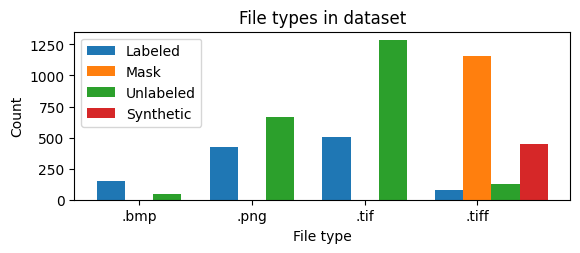

In [4]:
x = np.arange(len(IMAGE_TYPES))  # the label locations
width = 0.25

# Display parallel histograms
plt.figure()
ax = plt.subplot(2, 1, 1)

index = 0
for cat, data in file_types.items():
    plt.bar(x + index * width, [len(data[key]) for key in IMAGE_TYPES], width, label=cat)
    index += 1
    
plt.title("File types in dataset")
plt.xlabel("File type")
plt.xticks(x + width, IMAGE_TYPES)
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
preprocess_dataset(dataroot)
for name, df in enumerate_frames(dataroot):
    category = MASK if (".labels" in name) else SYNTHETIC
    assert set(df["Mask"]) == file_types[category][".tiff"]
    #preprocess_images(dataroot, df)
    preprocess_masks(dataroot, df)
    save_maskframes(dataroot, df)
    pass

In [5]:
sample = "/zenodo/Testing/Public/labels/OpenTest_006_label"
maskDF = pd.read_csv(dataroot + "/processed" + sample + ".csv")
save_hue_mask(dataroot + "/raw", dataroot + "/processed", sample + ".tiff", maskDF)
maskDF

0.0 1.0


,ID,X,Y,Left,Right,Top,Bottom,Area
0,0,501,585,0,1080,0,1080,504393
1,1,170,37,146,194,0,86,2329
2,2,209,50,182,237,0,115,4736
3,3,288,36,258,319,0,78,2829
4,4,576,15,540,621,0,46,1927
...,...,...,...,...,...,...,...,...
160,160,1058,664,1028,1080,634,696,2058
161,161,1037,505,1016,1064,489,528,1093
162,162,189,891,149,223,846,923,2563
163,163,604,178,567,651,140,226,2065


In [6]:
data_map, synth_map = [df for name, df in enumerate_frames(dataroot)]

print("Valeurs aberrantes?")
data_map[data_map["Objects"] > 2000]

Valeurs aberrantes?


,Path,Mask,Width,Height,Objects,Background
919,/zenodo/Testing/Public/WSI/Adenoid.tif,/zenodo/Testing/Public/WSI-labels/Adenoid_labe...,12775,9890,271726,23260506
936,/zenodo/Tuning/images/cell_00101.tif,/zenodo/Tuning/labels/cell_00101_label.tiff,10496,8415,96234,19627248
943,/zenodo/Tuning/images/cell_00074.tif,/zenodo/Tuning/labels/cell_00074_label.tiff,2048,2048,6519,1651477
1108,/zenodo/Testing/Public/WSI/Tonsil.tiff,/zenodo/Testing/Public/WSI-labels/Tonsil_label...,20000,20000,541487,154624799


In [7]:

exts = set()
for filepath in data_map["Path"]:
    folder, name, ext = split_filepath(filepath)
    exts.add(ext)
exts, file_types[LABELED][".tiff"]

({'.bmp', '.png', '.tif', '.tiff'},
 {'/zenodo/Testing/Public/WSI/Tonsil.tiff',
  '/zenodo/Testing/Public/images/OpenTest_032.tiff',
  '/zenodo/Testing/Public/images/OpenTest_042.tiff',
  '/zenodo/Testing/Public/images/OpenTest_043.tiff',
  '/zenodo/Testing/Public/images/OpenTest_048.tiff',
  '/zenodo/Testing/Public/images/OpenTest_050.tiff',
  '/zenodo/Training-labeled/images/cell_00301.tiff',
  '/zenodo/Training-labeled/images/cell_00302.tiff',
  '/zenodo/Training-labeled/images/cell_00303.tiff',
  '/zenodo/Training-labeled/images/cell_00304.tiff',
  '/zenodo/Training-labeled/images/cell_00305.tiff',
  '/zenodo/Training-labeled/images/cell_00306.tiff',
  '/zenodo/Training-labeled/images/cell_00307.tiff',
  '/zenodo/Training-labeled/images/cell_00308.tiff',
  '/zenodo/Training-labeled/images/cell_00309.tiff',
  '/zenodo/Training-labeled/images/cell_00310.tiff',
  '/zenodo/Training-labeled/images/cell_00311.tiff',
  '/zenodo/Training-labeled/images/cell_00312.tiff',
  '/zenodo/Training

919     271726
936      96234
943       6519
1108    541487
Name: Objects, dtype: int64
1149 213412 {3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 123, 124, 125, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 157, 159, 160, 161, 162, 164, 165, 167, 169, 170, 171, 172, 174, 175, 177, 179, 181, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 195, 196, 197, 199, 201, 202, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 216, 218, 219, 224, 225, 226, 228, 229, 240, 241, 246, 248, 250, 252, 254, 255, 256, 2

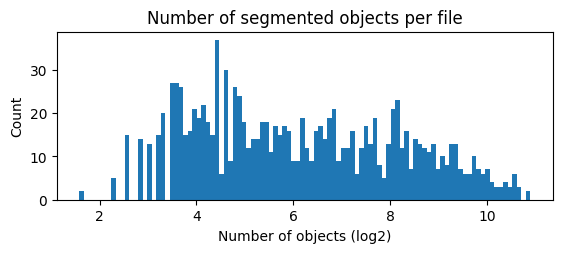

In [8]:

num_obj = data_map["Objects"]
print(num_obj[num_obj > 2000])
num_obj = num_obj[num_obj < 2000]
print(len(num_obj), sum(num_obj), set(num_obj))

# Display parallel histograms
plt.figure()
plt.subplot(2, 1, 1)
plt.hist(np.log2([x for x in num_obj]), bins=100)
plt.title("Number of segmented objects per file")
plt.xlabel("Number of objects (log2)")
#plt.xticks([2.0 ** x for x in range(5)])
plt.ylabel("Count")
plt.show()

73
Too big: 5


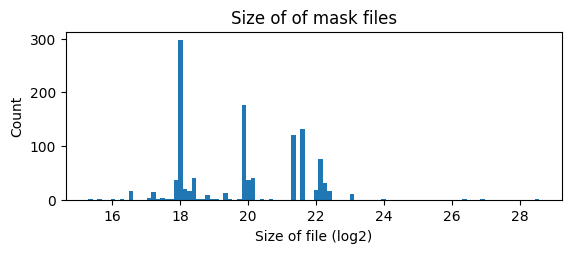

In [9]:
print(len(set(n for n in (data_map["Width"] * data_map["Height"]))))

area = data_map["Width"] * data_map["Height"]
print("Too big:", area[area > 10 ** 7].count())
#area = area[area < 10 ** 7]

# Display parallel histograms
plt.figure()
plt.subplot(2, 1, 1)
plt.hist(np.log2(area), bins=100)
#plt.hist([np.log2(n) for n in numbers if n < 2000], bins=100)
plt.title("Size of of mask files")
plt.xlabel("Size of file (log2)")
#plt.xticks([2.0 ** x for x in range(5)])
plt.ylabel("Count")
plt.show()

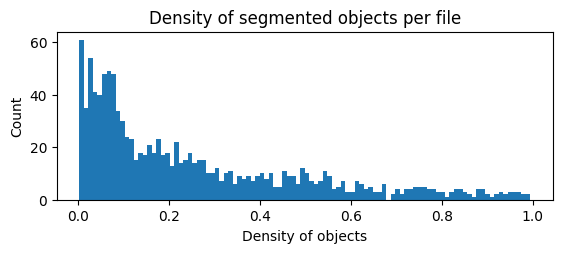

In [10]:
#print(set(n[2] for n in numbers))

density = 1 - (data_map["Background"] / data_map["Width"] / data_map["Height"])

plt.figure()
plt.subplot(2, 1, 1)
plt.hist(density, bins=100)
#plt.hist([-np.log2(n[2]) for n in numbers], bins=100)
plt.title("Density of segmented objects per file")
plt.xlabel("Density of objects")
#plt.xticks([2.0 ** x for x in range(5)])
plt.ylabel("Count")
plt.show()

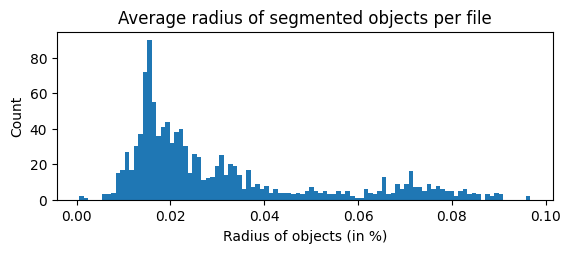

In [11]:
radius = (density / data_map["Objects"] / np.pi) ** .5

plt.figure()
plt.subplot(2, 1, 1)
plt.hist(radius, bins=100)
#plt.hist([-np.log2(n[2]) for n in numbers], bins=100)
plt.title("Average radius of segmented objects per file")
plt.xlabel("Radius of objects (in %)")
#plt.xticks([2.0 ** x for x in range(8)])
plt.ylabel("Count")
plt.show()